In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raviteja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df = pd.read_csv('amazon_reviews.csv')
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [19]:
df = df[['overall','reviewText']]
df.head()

,overall,reviewText
0,4.0,No issues.
1,5.0,"Purchased this for my device, it worked as adv..."
2,4.0,it works as expected. I should have sprung for...
3,5.0,This think has worked out great.Had a diff. br...
4,5.0,"Bought it with Retail Packaging, arrived legit..."


In [20]:
df.dropna(inplace=True)

In [21]:
df['Polarity_Rating'] = df['overall'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [8]:
df.head()

,overall,reviewText,Polarity_Rating
0,4.0,No issues.,Positive
1,5.0,"Purchased this for my device, it worked as adv...",Positive
2,4.0,it works as expected. I should have sprung for...,Positive
3,5.0,This think has worked out great.Had a diff. br...,Positive
4,5.0,"Bought it with Retail Packaging, arrived legit...",Positive


<AxesSubplot:xlabel='overall', ylabel='count'>

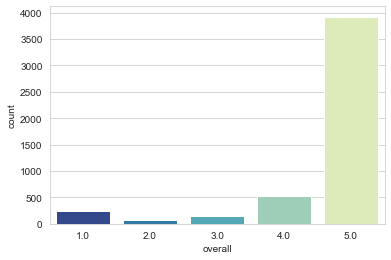

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='overall',data=df, palette='YlGnBu_r')

<AxesSubplot:xlabel='Polarity_Rating', ylabel='count'>

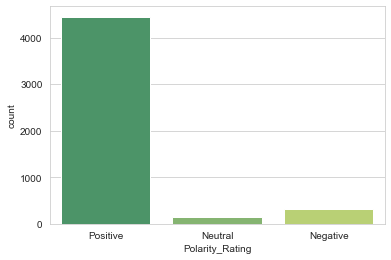

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='summer')

In [12]:
df.count()

overall            4914
reviewText         4914
Polarity_Rating    4914
dtype: int64

In [24]:
df = df[['reviewText','Polarity_Rating']]

In [25]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df.drop(['Polarity_Rating'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

,reviewText,Negative,Neutral,Positive
0,No issues.,0,0,1
1,"Purchased this for my device, it worked as adv...",0,0,1
2,it works as expected. I should have sprung for...,0,0,1
3,This think has worked out great.Had a diff. br...,0,0,1
4,"Bought it with Retail Packaging, arrived legit...",0,0,1


In [26]:
X = df['reviewText'].values
y = df.drop('reviewText', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [27]:
print(X_test)

["This super-speed card works great in my phone. I haven't had any problems with it since I bought the thing! I'm certainly able to record HD video right onto the card no problem. I recommend this for those who need quick data delivery to and from there external card. I recommend it!"
 'I purchased this product knowing there might be an issue with the galaxy s4. This card worked for a week or two then began to spontaneously unmount and would mount itself back in. The unmount periods began to become longer than a few hours, days! I tried this card in a galaxy note 2 still with the same result. I attempted to contact Sandisk customer service and utilize the warranty. They know of the problem and began the exchange process then instructed me to wait for a mailing label that never came. I called back and was told that they would re-email it to me. To this day I am still waiting for that email. I have never had this issue with this company but with  ever changing technology, it is what it i

In [28]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [29]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [30]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
y_pred=clf.predict(X_test)

In [32]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9077966101694915


In [51]:
ex = ["It works, but file writes are a bit slow than expected.Also, both reads and writes are FASTER with the card inside the standard-size SD adapter (15 MB/s vs 10 write; 45 MB/s vs 22 MB/s read) on the same card reader."]

In [52]:
ex_v = vect.transform(ex)
ex_v_tfidf = tfidf.transform(ex_v)
testing = clf.predict(ex_v_tfidf)

In [53]:
print(testing)

[[0 0 1]]
